#  ICA Tutorial MNE

https://mne.tools/stable/auto_tutorials/discussions/plot_background_ica.html#sphx-glr-auto-tutorials-discussions-plot-background-ica-py


## ICA model

$X = AS$

Where $S$ represents the original sources, $A$ the mixing matrix, and $X$ the resulting measurements.


In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

np.random.seed(0)  # set seed for reproducible results
n_samples = 2000
time = np.linspace(0, 8, n_samples)



In [2]:
#Signal Genearation

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: sawtooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data

# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

S shape (2000, 3)


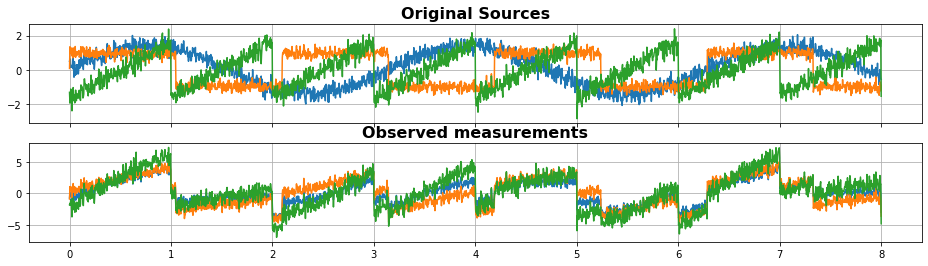

In [29]:
print("S shape", S.shape)

#Plot Original Sources
fig, axes = plt.subplots(2,1,figsize=(16,4), sharex=True)


models = [S,X]
titles = ["Original Sources", "Observed measurements"]
for model, t, ax in zip(models, titles, axes.reshape(-1,)):
    for sig in model.T:
        ax.plot(time,sig)
        ax.grid()
        
    title = ax.set_title(t)
    title.set_fontsize(16);title.set_fontweight("bold");


# print(title.get_fontweight())
# print(dir(title))


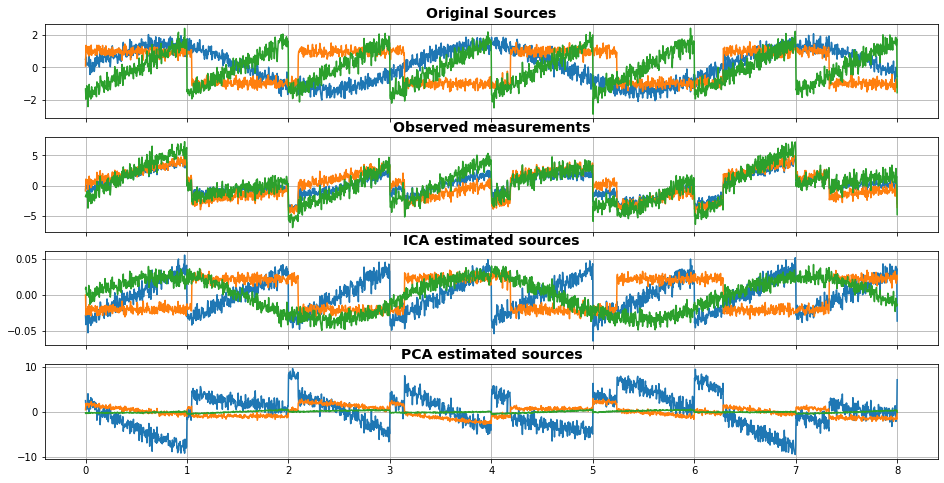

In [38]:
#Apply PCA and ICA source separation

# compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_  # Get estimated mixing matrix

# compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # estimate PCA sources

row=4
fig, axes = plt.subplots(1*row,1,figsize=(16,2*row), sharex=True)

models = [S,X, S_, H]
titles = ["Original Sources", "Observed measurements","ICA estimated sources", "PCA estimated sources"]
for model, t, ax in zip(models, titles, axes.reshape(-1,)):
    for sig in model.T:
        ax.plot(time,sig)
        ax.grid()
        
    title = ax.set_title(t)
    title.set_fontsize(14);title.set_fontweight("bold");

    
